In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv(r'/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#Knowing of Data

In [3]:
#shape of data
print("Shape of data : ",df.shape)

Shape of data :  (2200, 8)


In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
#List of various crops
print("Number of various crops:", len(df['label'].unique()))
print("List of crops:", df['label'].unique())

Number of various crops: 22
List of crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [7]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
df_summary=pd.pivot_table(df,index=['label'],aggfunc='mean')
df_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


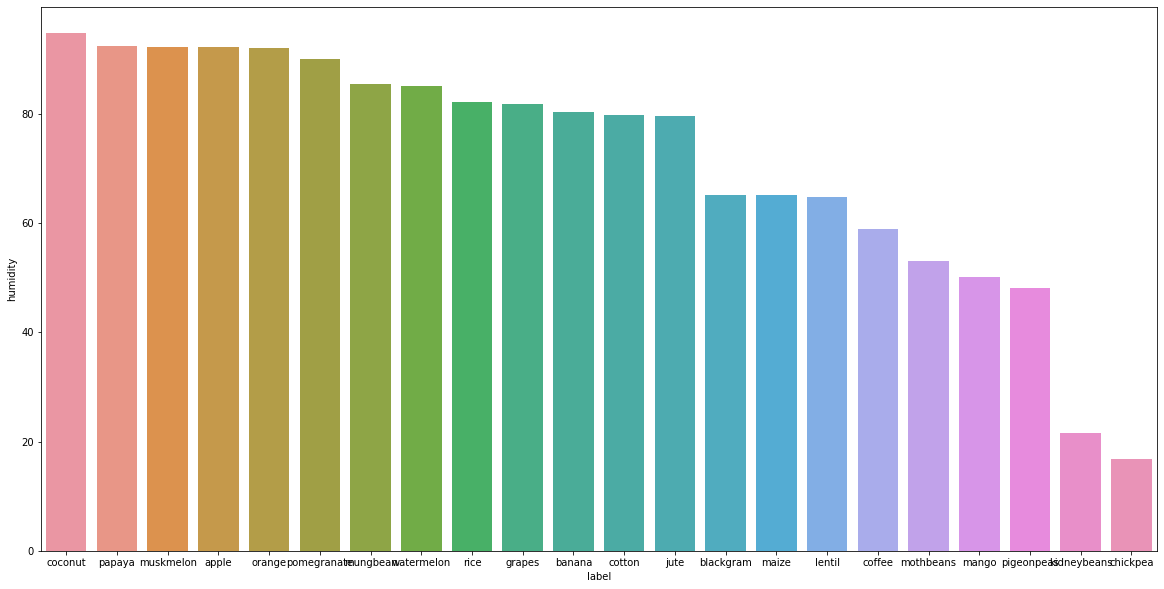

In [9]:
crop_summary_humidity = df_summary.sort_values(by='humidity', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(y = crop_summary_humidity['humidity'],x = crop_summary_humidity.index)
plt.show()

In [10]:
#Nitrogen analysis

In [11]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [12]:
df_summary_N = df_summary.sort_values(by='N', ascending = False)

In [13]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : df_summary_N['N'][0:10].sort_values().index,
    'x' : df_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : df_summary_N['N'][-10:].index,
    'x' : df_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Phosphorus Analysis

In [14]:
crop_summary_P = df_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=1)

top = {
    'y' : crop_summary_P['P'][0:23].sort_values().index,
    'x' : crop_summary_P['P'][0:23].sort_values()
}

# last = {
#     'y' : crop_summary_P['P'][-10:].index,
#     'x' : crop_summary_P['P'][-10:]
#     }

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
            text=last['x']),
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=18, 
                  font_color='black',
                 height=600)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Potassium Analysis

In [15]:
crop_summary_K = df_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

N, P, K values comparision between crops

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

NPK ratio for rice, cotton, jute, maize, lentil

In [17]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = df_summary[df_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = df_summary[df_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = df_summary[df_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = df_summary[df_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = df_summary[df_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()

NPK ratio for fruits

In [18]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = df_summary[df_summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = df_summary[df_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = df_summary[df_summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = df_summary[df_summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = df_summary[df_summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = df_summary[df_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = df_summary[df_summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = df_summary[df_summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = df_summary[df_summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = df_summary[df_summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()

In [19]:
crop_scatter = df[(df['label']=='rice') | 
                      (df['label']=='jute') | 
                      (df['label']=='cotton') |
                     (df['label']=='maize') |
                     (df['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [20]:
fig = px.bar(df_summary, x=df_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Correlation between different features

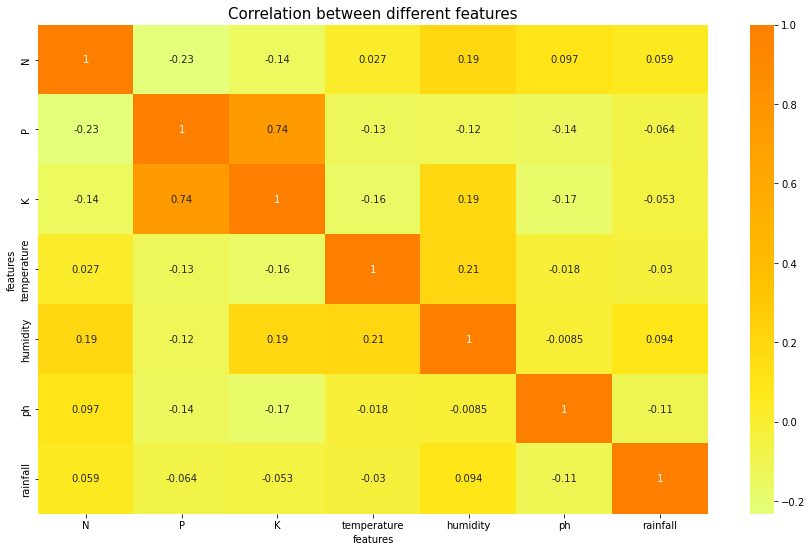

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='Wistia' )
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

Declare independent and target variables

In [22]:
X = df.drop('label', axis=1)
y = df['label']

Split dataset into training and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

LightGBM Model Building and Training


In [24]:
# build the lightgbm model
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

Model Prediction


In [25]:
# predict the results
y_pred=model.predict(X_test)


View Accuracy

In [26]:

# view accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9833


Compare train and test set accuracy


In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9833


Confusion-matrix


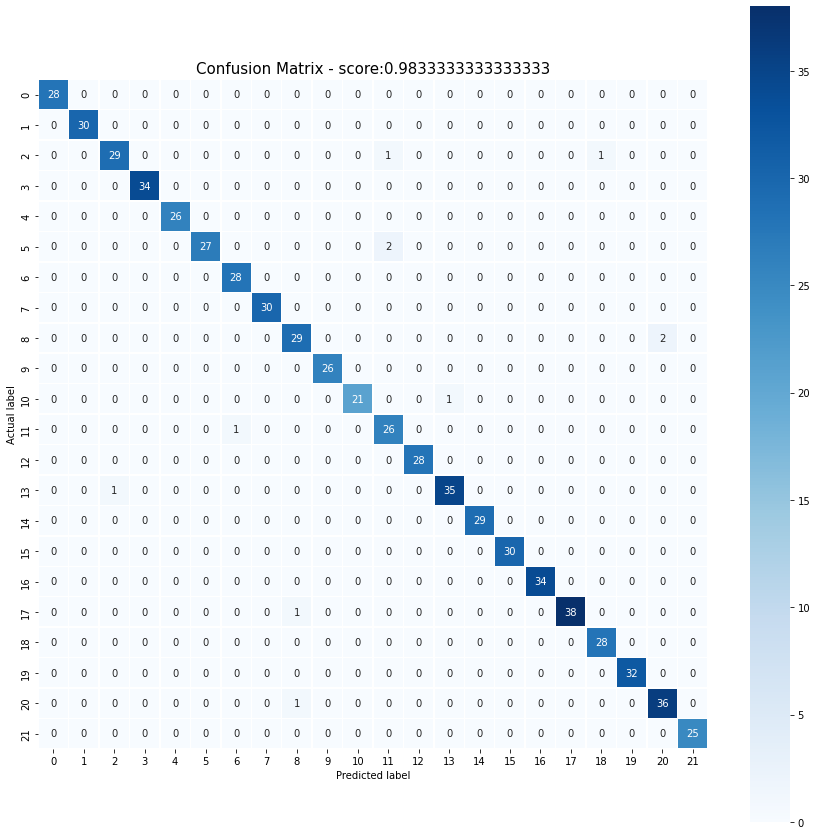

In [28]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

Classification Metrices


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.94      0.95        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.93      0.96        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      0.95      0.98        22
       maize       0.90      0.96      0.93        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.97      0.97      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [30]:
newdata=model.predict([[79, 51, 16, 60.879744, 75, 5.5,220]])
newdata

array(['maize'], dtype=object)